In [1]:
! pip install -q kaggle

In [2]:

import pandas as pd
from IPython.display import YouTubeVideo

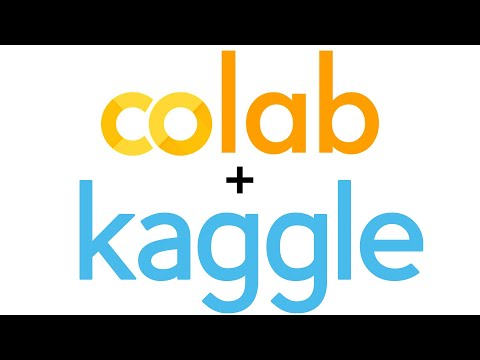

In [3]:
#tutorial on YouTube
YouTubeVideo('m-As6o-SLtI')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kelvinmmpofu","key":"d5b3087490dbca20aacf053bd67aeec1"}'}

In [5]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions list

ref                                                  deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                         2030-07-01 23:59:00  Getting Started     Prizes         61           False  
gan-getting-started                                  2030-07-01 23:59:00  Getting Started     Prizes        141           False  
tpu-getting-started                                  2030-06-03 23:59:00  Getting Started  Knowledge        188           False  
digit-recognizer                                     2030-01-01 00:00:00  Getting Started  Knowledge       1575           False  
titanic                                              2030-01-01 00:00:00  Getting Started  Knowledge      50080            True  
house-prices-advanced-regression-techniques          2030-01-01 00:00:00  Getting Started 

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-31 12:40:41          11429  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6948  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2694  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1750  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [8]:

!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 4.52MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 62.4MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.7MB/s]


In [9]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re


################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string) 
    return string

def col_header_val(df,table_config):
    '''
    replace whitespaces in the column
    and standardized column names
    '''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('[^\w]','_',regex=True)
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x,'_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(),  table_config['columns']))
    expected_col.sort()
    df.columns =list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)
    if len(df.columns) == len(expected_col) and list(expected_col)  == list(df.columns):
        print("column name and column length validation passed")
        return 1
    else:
        print("column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file",mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded",missing_YAML_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0

Writing testutility.py


In [10]:
%%writefile file.yaml
file_type: csv
dataset_name: testfile
file_name: test
table_name: edsurv
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns: 
    - city
    - price
    - distance

Writing file.yaml


In [11]:
# Read config file
import testutility as util
config_data = util.read_config_file("file.yaml")

In [12]:
config_data['inbound_delimiter']

','

In [13]:
#inspecting data of config file
config_data

{'columns': ['city', 'price', 'distance'],
 'dataset_name': 'testfile',
 'file_name': 'test',
 'file_type': 'csv',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'table_name': 'edsurv'}

In [17]:
%%time
# read the file using config file
file_type = config_data['file_type']
source_file = "" + config_data['file_name'] + f'.{file_type}'
#print("",source_file)
df = pd.read_csv(source_file, sep = config_data['inbound_delimiter'])

CPU times: user 9.19 ms, sys: 2.42 ms, total: 11.6 ms
Wall time: 27.8 ms


In [18]:
util.col_header_val(df, config_data)

column name and column length validation failed
Following File columns are not in the YAML file ['embarked', 'sex', 'fare', 'parch', 'passengerid', 'cabin', 'sibsp', 'pclass', 'age', 'name', 'ticket']
Following YAML columns are not in the file uploaded ['city', 'distance', 'price']


0

In [27]:
!pip install dask[dataframe]

     |████████████████████████████████| 119 kB 4.7 MB/s 


In [28]:
import os
import dask.dataframe as dd


import warnings
warnings.filterwarnings(action="ignore")

In [23]:

%%time
df = pd.read_csv('test.csv')
print(f'Number of Rows: {len(df)}, Number of Columns: {len(df.columns)}')
print(f"Size: {os.path.getsize('test.csv')/10**9:.2f} GB")

Number of Rows: 418, Number of Columns: 11
Size: 0.00 GB
CPU times: user 6.75 ms, sys: 0 ns, total: 6.75 ms
Wall time: 8.56 ms


In [29]:
%%time
df = dd.read_csv('test.csv')
print(f'Number of Rows: {len(df)}, Number of Columns: {len(df.columns)}')
print(f"Size: {os.path.getsize('test.csv')/10**9:.2f} GB")

Number of Rows: 418, Number of Columns: 11
Size: 0.00 GB
CPU times: user 28 ms, sys: 4.18 ms, total: 32.1 ms
Wall time: 35.6 ms


In [30]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
import datetime
import csv
import gzip

# Write csv in gz format in pipe separated text file (|)
df.to_csv('test.gz',
          sep='|',
          header=True,
          index=False,
          quoting=csv.QUOTE_ALL,
          compression='gzip',
          quotechar='"',
          doublequote=True,
          line_terminator='\n')

['/content/test.gz/0.part']

In [ ]:
# Normal reading process of the file
import pandas as pd
df_sample = pd.read_csv("test.csv",delimiter=',')
df_sample.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# read the file using config file
file_type = config_data['file_type']
source_file = "./" + config_data['file_name'] + f'.{file_type}'
#print("",source_file)
df = pd.read_csv(source_file,config_data['inbound_delimiter'])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#validate the header of the file
util.col_header_val(df,config_data)

column name and column length validation failed
Following File columns are not in the YAML file ['passengerid', 'embarked', 'fare', 'parch', 'pclass', 'sex', 'age', 'cabin', 'ticket', 'sibsp', 'name']
Following YAML columns are not in the file uploaded ['city', 'distance', 'price']


0

In [ ]:
print("columns of files are:" ,df.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
columns of YAML are: ['city', 'price', 'distance']


In [ ]:
if util.col_header_val(df,config_data)==0:
    print("validation failed")
    # write code to reject the file
else:
    print("col validation passed")
    # write the code to perform further action
    # in the pipleine

column name and column length validation failed
Following File columns are not in the YAML file ['passengerid', 'embarked', 'fare', 'parch', 'pclass', 'sex', 'age', 'cabin', 'ticket', 'sibsp', 'name']
Following YAML columns are not in the file uploaded ['city', 'distance', 'price']
validation failed


In [ ]:
pd.read_csv("./test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
### Creating test file for this demo:
testdata = {
    'city' : ['Delhi', 'Lima', 'Istanbul','Riyadh'],
    'age' : [34, 30, 16,33],
    'Country' : ['India','Peru','Turkey','Saudi Arabia']
}
import pandas as pd
df = pd.DataFrame(testdata, columns=['city', 'age','Country'])
df.to_csv("test.csv",index=False)

In [ ]:
df

,city,age,Country
0,Delhi,34,India
1,Lima,30,Peru
2,Istanbul,16,Turkey
3,Riyadh,33,Saudi Arabia


In [ ]:
testdata

{'Country': ['India', 'Peru', 'Turkey', 'Saudi Arabia'],
 'age': [34, 30, 16, 33],
 'city': ['Delhi', 'Lima', 'Istanbul', 'Riyadh']}

In [ ]:
!pip install dask[dataframe]


     |████████████████████████████████| 118 kB 37.9 MB/s 


In [ ]:
# Define the Imports 
try:
    import os
    import json
    import math
    import dask
    from dask.distributed import Client
    import dask.dataframe as dd
    import numpy as np
    import dask.multiprocessing
except Exception as e:
    print("Some Modules are Missing : {} ".format(e))

In [ ]:
os.listdir()

['.config',
 'train.csv',
 '.ipynb_checkpoints',
 'testutility.py',
 'kaggle.json',
 'file.yaml',
 'gender_submission.csv',
 'test.csv',
 '__pycache__',
 'sample_data']

In [ ]:
size = os.path.getsize("test.csv") / math.pow(1024,3)
print("Size in GB : {} ".format(size))

Size in GB : 8.102506399154663e-08 


In [ ]:
client = Client(n_workers=4, threads_per_worker=4)

/usr/local/lib/python3.7/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

failed to validate _ServerOpts(...).prefix: expected a value of type str, got None of type NoneType
  self.scheduler.start(scheduler_address)
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - ERROR - Failed while trying to start worker process: failed to validate _ServerOpts(...).prefix: expected a value of type str, got None of type NoneType
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - ERROR - Failed while trying to start worker process: failed to validate _ServerOpts(...).prefix: expected a value of type str, got None of type NoneType
distributed.nanny - ERROR - Failed to restart worker after its process exited
Traceback (most recent call last)

TimeoutError: ignored